# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv("/Users/brennanseanm/Jupyter-Workspace/.env")

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
btc_response = requests.get(btc_url).json()
btc_price = btc_response["data"]["1"]["quotes"]["USD"]["price"]

# Fetch current ETH price
eth_response = requests.get(eth_url).json()
eth_price = eth_response["data"]["1027"]["quotes"]["USD"]["price"]

# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $62707.20
The current value of your 5.3 ETH is $8617.53


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Current amount of shares
my_agg = 50
my_spy = 200

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [8]:
# Format current date as ISO format
today = pd.Timestamp("2020-07-14", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Preview DataFrame
df_portfolio

AGG                                      SPY  \
                             open    high     low    close   volume   open   
time                                                                         
2020-07-14 00:00:00-04:00  118.58  118.74  118.58  118.655  3611959  313.3   

                                                          
                             high  low   close    volume  
time                                                      
2020-07-14 00:00:00-04:00  319.76  312  318.89  79292036

In [9]:
# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio['AGG']['close'])
spy_close_price = float(df_portfolio['SPY']['close'])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $118.655
Current SPY closing price: $318.89


In [10]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 200 SPY shares is $63778.00
The current value of your 50 AGG shares is $5932.75


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
savings_df = pd.DataFrame()

# Set current amount of shares data
my_crypto_value = my_btc_value + my_eth_value
my_stock_value = my_spy_value + my_agg_value

savings_data = {
    "Value": [my_crypto_value, my_stock_value]
}

# Set the mix titles
savings_portfolio = ["Crypto", "Shares"]

# Create the shares DataFrame
savings_df = pd.DataFrame(savings_data, index=savings_portfolio)

# Display savings DataFrame
display(savings_df)

,Value
Crypto,71324.735
Shares,69710.750


<AxesSubplot:title={'center':'Savings Composition'}, ylabel='Value'>

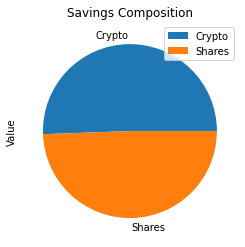

In [12]:
# Plot savings pie chart
savings_df.plot.pie(y="Value", title='Savings Composition')

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = my_crypto_value + my_stock_value

# Validate saving health
if total_savings > emergency_fund:
    print(f"Congratulations for having enough money in your savings fund")
elif total_savings >= emergency_fund:
    print(f"Congratulating for reaching your savings goal!")
elif total_savings < emergency_fund:
    print(f"More savings needed, you need {emergency_fund - total_savings} to reach your savings goal!")
else:
    print(f"You have no savings, get to work!")


Congratulations for having enough money in your savings fund


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-03-19', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-03-19', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

# Display sample data
df_stock_data.dropna
df_stock_data

AGG                                      \
                             open      high      low   close   volume   
time                                                                    
2017-03-30 00:00:00-04:00  108.52  108.5800  108.380  108.41  1611863   
2017-03-31 00:00:00-04:00  108.44  108.5300  108.420  108.52  3151075   
2017-04-03 00:00:00-04:00  108.31  108.6800  108.300  108.67  3857775   
2017-04-04 00:00:00-04:00  108.61  108.6500  108.520  108.56  1482935   
2017-04-05 00:00:00-04:00  108.48  108.7400  108.453  108.69  1900282   
...                           ...       ...      ...     ...      ...   
2021-03-15 00:00:00-04:00  113.60  114.0100  113.600  113.94  4210749   
2021-03-16 00:00:00-04:00  113.97  114.0320  113.780  113.87  3977851   
2021-03-17 00:00:00-04:00  113.55  113.9778  113.480  113.87  5023810   
2021-03-18 00:00:00-04:00  113.32  113.8600  113.200  113.42  6077516   
2021-03-19 00:00:00-04:00  113.40  113.5400  113.330  113.50  4674852   

                               SPY                                      
                              open     high      low   close    volume  
time                                                                    
2017-03-30 00:00:00-04:00  235.490  236.520  235.270  236.27  40604487  
2017-03-31 00:00:00-04:00  235.905  236.510  235.680  235.71  47583793  
2017-04-03 00:00:00-04:00  235.800  236.030  233.910  235.37  58627715  
2017-04-04 00:00:00-04:00  235.000  235.580  234.555  235.51  43130784  
2017-04-05 00:00:00-04:00  236.260  237.390  234.540  234.77  84819899  
...                            ...      ...      ...     ...       ...  
2021-03-15 00:00:00-04:00  394.330  396.685  392.030  396.47  64471980  
2021-03-16 00:00:00-04:00  397.070  397.830  395.080  395.94  65719794  
2021-03-17 00:00:00-04:00  394.530  398.120  393.300  397.22  61876016  
2021-03-18 00:00:00-04:00  394.475  396.720  390.750  391.41  98794050  
2021-03-19 00:00:00-04:00  389.880  391.569  387.150  389.50  93819590  

[1000 rows x 10 columns]

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
num_sims = 500

MC_30year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = num_sims,
    num_trading_days = 252*30
)

In [17]:
# Printing the simulation input data
MC_30year.portfolio_data.head()

AGG                                    \
                             open    high      low   close   volume   
time                                                                  
2017-03-30 00:00:00-04:00  108.52  108.58  108.380  108.41  1611863   
2017-03-31 00:00:00-04:00  108.44  108.53  108.420  108.52  3151075   
2017-04-03 00:00:00-04:00  108.31  108.68  108.300  108.67  3857775   
2017-04-04 00:00:00-04:00  108.61  108.65  108.520  108.56  1482935   
2017-04-05 00:00:00-04:00  108.48  108.74  108.453  108.69  1900282   

                                            SPY                           \
                          daily_return     open    high      low   close   
time                                                                       
2017-03-30 00:00:00-04:00          NaN  235.490  236.52  235.270  236.27   
2017-03-31 00:00:00-04:00     0.001015  235.905  236.51  235.680  235.71   
2017-04-03 00:00:00-04:00     0.001382  235.800  236.03  233.910  235.37   
2017-04-04 00:00:00-04:00    -0.001012  235.000  235.58  234.555  235.51   
2017-04-05 00:00:00-04:00     0.001197  236.260  237.39  234.540  234.77   

                                                  
                             volume daily_return  
time                                              
2017-03-30 00:00:00-04:00  40604487          NaN  
2017-03-31 00:00:00-04:00  47583793    -0.002370  
2017-04-03 00:00:00-04:00  58627715    -0.001442  
2017-04-04 00:00:00-04:00  43130784     0.000595  
2017-04-05 00:00:00-04:00  84819899    -0.003142

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999773,1.005913,1.010255,0.994505,1.008126,0.996692,1.008594,0.999915,1.015441,1.006105,...,1.002094,0.995539,0.993771,1.013720,1.007191,1.002597,0.994840,0.992461,1.006303,1.010920
2,0.998701,1.007564,1.007127,0.980223,1.005921,0.993167,1.012516,0.988109,1.014306,0.990377,...,0.996884,0.989524,1.001342,1.014355,1.006796,0.999553,1.002452,1.007531,1.017477,1.009133
3,0.985620,1.025602,0.994383,0.989716,0.999840,0.991806,1.018129,0.978743,1.005818,0.996023,...,0.996810,0.995212,1.009343,1.026138,1.003230,0.991949,0.999690,1.006317,1.016262,1.014236
4,0.988570,1.026767,0.985522,1.000564,0.996813,0.991191,1.030686,0.986647,1.004550,0.988135,...,0.997134,0.999844,1.008330,1.036031,1.010623,0.994074,0.986972,1.012121,1.000101,1.014174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,20.917601,9.615715,8.018202,2.377256,9.748118,19.984376,10.919391,4.745166,16.965949,32.370033,...,41.261330,6.010145,18.954830,12.372962,24.261224,5.786471,12.386314,15.863745,62.730129,23.372365
7557,20.925938,9.625161,8.110551,2.371749,9.735839,19.851241,10.837656,4.762266,16.798104,32.536119,...,40.940440,5.974397,18.959459,12.423319,24.388398,5.749246,12.444424,15.931310,62.844039,23.289781
7558,21.275640,9.474355,8.239160,2.391089,9.774514,20.177365,10.897636,4.736568,16.874279,32.033621,...,40.347931,5.956664,19.063961,12.424925,24.498391,5.762504,12.376705,15.968888,63.521535,23.141297
7559,21.203236,9.617059,8.331659,2.373059,9.683915,20.280292,10.757258,4.775757,16.752546,31.863243,...,40.099945,5.875570,19.069932,12.422355,24.393569,5.818923,12.381580,15.989778,64.407887,23.380089


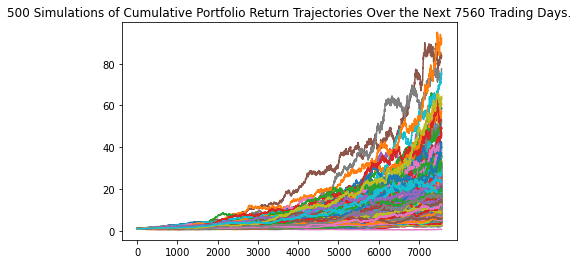

In [19]:
# Plot simulation outcomes
line_plot_30 = MC_30year.plot_simulation()

# Save the plot for future usage
line_plot_30.get_figure().savefig("MC_30year_sim_plot.png", bbox_inches="tight")

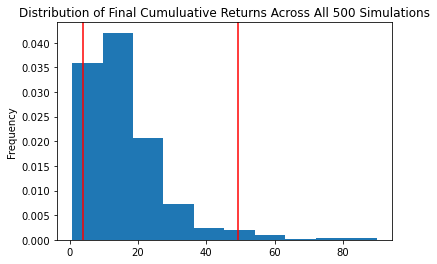

In [20]:
# Plot probability distribution and confidence intervals
dist_plot_30 = MC_30year.plot_distribution()

# Save the plot for future usage
dist_plot_30.get_figure().savefig('MC_30year_dist_plot.png',bbox_inches='tight')

### Retirement Analysis

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_30 = MC_30year.summarize_cumulative_return()

# Print summary statistics
print(tbl_30)

count           500.000000
mean             16.292242
std              11.956730
min               0.750309
25%               8.498855
50%              13.381374
75%              20.442533
max              89.733163
95% CI Lower      3.944463
95% CI Upper     49.119320
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [22]:
# Set initial investment
initial_investment_30 = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower_30 = round(tbl_30[8]*initial_investment_30,2)
ci_upper_30 = round(tbl_30[9]*initial_investment_30,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_30} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower_30} and ${ci_upper_30}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $78889.26 and $982386.41


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [23]:
# Set initial investment
initial_investment_thityB = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower_30 = round(tbl_30[8]*initial_investment_30,2)
ci_upper_30 = round(tbl_30[9]*initial_investment_30,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_thityB} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower_30} and ${ci_upper_30}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $78889.26 and $982386.41


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [24]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
num_sims = 500

MC_5year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = num_sims,
    num_trading_days = 252*5
)

MC_5year.portfolio_data.head()

AGG                                    \
                             open    high      low   close   volume   
time                                                                  
2017-03-30 00:00:00-04:00  108.52  108.58  108.380  108.41  1611863   
2017-03-31 00:00:00-04:00  108.44  108.53  108.420  108.52  3151075   
2017-04-03 00:00:00-04:00  108.31  108.68  108.300  108.67  3857775   
2017-04-04 00:00:00-04:00  108.61  108.65  108.520  108.56  1482935   
2017-04-05 00:00:00-04:00  108.48  108.74  108.453  108.69  1900282   

                                            SPY                           \
                          daily_return     open    high      low   close   
time                                                                       
2017-03-30 00:00:00-04:00          NaN  235.490  236.52  235.270  236.27   
2017-03-31 00:00:00-04:00     0.001015  235.905  236.51  235.680  235.71   
2017-04-03 00:00:00-04:00     0.001382  235.800  236.03  233.910  235.37   
2017-04-04 00:00:00-04:00    -0.001012  235.000  235.58  234.555  235.51   
2017-04-05 00:00:00-04:00     0.001197  236.260  237.39  234.540  234.77   

                                                  
                             volume daily_return  
time                                              
2017-03-30 00:00:00-04:00  40604487          NaN  
2017-03-31 00:00:00-04:00  47583793    -0.002370  
2017-04-03 00:00:00-04:00  58627715    -0.001442  
2017-04-04 00:00:00-04:00  43130784     0.000595  
2017-04-05 00:00:00-04:00  84819899    -0.003142

In [25]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.995603,1.000508,1.002445,1.003001,1.003688,1.000122,1.019407,1.005966,1.004771,1.000984,...,0.986171,1.001414,0.994039,0.990334,0.997085,0.990881,1.003656,0.996898,0.996384,0.996195
2,0.987864,1.007819,1.018477,1.007691,1.001055,0.995832,1.019580,1.013416,1.006610,1.005008,...,0.990529,0.995614,0.993470,0.981326,1.005957,0.977158,0.996922,0.998970,1.006367,1.000195
3,0.990973,0.997573,1.012966,1.014040,1.003498,1.010193,1.019259,1.021177,0.996518,1.005595,...,1.000453,0.996474,0.992041,0.980266,1.012660,0.964993,0.989662,1.006214,1.010238,1.020667
4,0.989254,0.995484,1.001825,1.029464,1.005160,1.018236,1.035981,1.018739,1.007851,0.998160,...,1.009213,0.980854,0.978533,0.974327,1.006518,0.965964,1.002741,1.003545,1.017918,1.030199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.107344,2.316160,2.000537,1.145126,1.630389,1.058000,1.016594,1.352178,2.070261,1.322741,...,1.351077,1.540888,1.033183,1.534055,1.040156,0.983182,1.320745,1.637867,1.309822,1.585665
1257,1.098049,2.330284,1.987862,1.147264,1.640551,1.076118,1.028202,1.357734,2.062998,1.328009,...,1.341189,1.540498,1.040731,1.531615,1.048791,0.987407,1.318338,1.629776,1.303956,1.596595
1258,1.098361,2.334280,1.948302,1.142492,1.633792,1.092158,1.026299,1.354901,2.062388,1.328399,...,1.331519,1.542829,1.040795,1.549645,1.051276,0.996112,1.328566,1.629170,1.294689,1.604651
1259,1.096092,2.342692,1.953855,1.158354,1.640373,1.105847,1.023688,1.372135,2.090883,1.323367,...,1.324829,1.540610,1.041507,1.549910,1.054101,0.982924,1.335047,1.637794,1.281761,1.607621


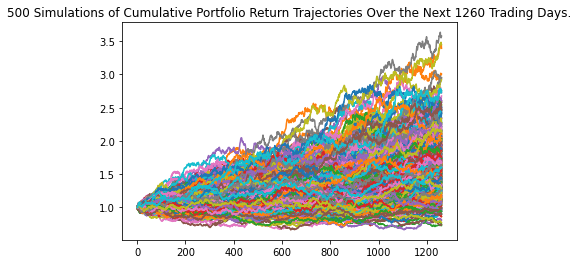

In [26]:
# Plot simulation outcomes
line_plot_five = MC_5year.plot_simulation()

# Save the plot for future usage
line_plot_five.get_figure().savefig("MC_10year_sim_plot.png", bbox_inches="tight")

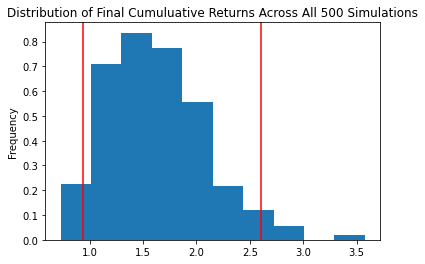

In [27]:
# Plot probability distribution and confidence intervals
dist_plot_five = MC_5year.plot_distribution()

# Save the plot for future usage
dist_plot_five.get_figure().savefig('MC_5year_dist_plot.png',bbox_inches='tight')

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_five = MC_5year.summarize_cumulative_return()

# Print summary statistics
print(tbl_five)

count           500.000000
mean              1.623608
std               0.457467
min               0.728005
25%               1.286052
50%               1.574502
75%               1.905009
max               3.576233
95% CI Lower      0.941361
95% CI Upper      2.605358
Name: 1260, dtype: float64


In [29]:
# Set initial investment
initial_investment_five = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl_five[8]*initial_investment_five,2)
ci_upper_five = round(tbl_five[9]*initial_investment_five,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_five} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $56481.63 and $156321.46


### Ten Years Retirement Option

In [30]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
num_sims = 500

MC_10year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = num_sims,
    num_trading_days = 252*10
)

MC_10year.portfolio_data.head()

AGG                                    \
                             open    high      low   close   volume   
time                                                                  
2017-03-30 00:00:00-04:00  108.52  108.58  108.380  108.41  1611863   
2017-03-31 00:00:00-04:00  108.44  108.53  108.420  108.52  3151075   
2017-04-03 00:00:00-04:00  108.31  108.68  108.300  108.67  3857775   
2017-04-04 00:00:00-04:00  108.61  108.65  108.520  108.56  1482935   
2017-04-05 00:00:00-04:00  108.48  108.74  108.453  108.69  1900282   

                                            SPY                           \
                          daily_return     open    high      low   close   
time                                                                       
2017-03-30 00:00:00-04:00          NaN  235.490  236.52  235.270  236.27   
2017-03-31 00:00:00-04:00     0.001015  235.905  236.51  235.680  235.71   
2017-04-03 00:00:00-04:00     0.001382  235.800  236.03  233.910  235.37   
2017-04-04 00:00:00-04:00    -0.001012  235.000  235.58  234.555  235.51   
2017-04-05 00:00:00-04:00     0.001197  236.260  237.39  234.540  234.77   

                                                  
                             volume daily_return  
time                                              
2017-03-30 00:00:00-04:00  40604487          NaN  
2017-03-31 00:00:00-04:00  47583793    -0.002370  
2017-04-03 00:00:00-04:00  58627715    -0.001442  
2017-04-04 00:00:00-04:00  43130784     0.000595  
2017-04-05 00:00:00-04:00  84819899    -0.003142

In [31]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.007733,0.998283,0.999163,0.995206,1.003946,0.988161,0.999509,1.010722,0.997932,0.994449,...,0.999137,1.007300,1.003143,0.998627,0.997466,0.998608,0.998605,0.984350,1.000974,1.010439
2,1.007977,1.019141,0.989856,0.994801,1.004465,0.990609,0.995807,1.013697,1.013745,0.995784,...,0.996689,1.015267,1.002016,0.990273,0.990024,0.993809,0.993552,0.979204,0.996834,1.001194
3,1.012366,1.009566,0.986065,1.007198,0.998404,0.997796,1.006862,1.024000,1.006657,0.984159,...,0.994070,1.011900,1.008482,0.988358,0.984803,0.980527,0.995031,0.972894,1.005695,1.013268
4,0.994237,1.019392,0.983299,1.003981,0.994617,1.009319,1.008763,1.031229,1.006801,0.994887,...,1.002597,1.012258,1.009778,0.984384,0.988754,0.987961,1.000799,0.977687,1.022050,0.997399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,3.428147,4.674345,2.837985,7.286326,1.362095,2.169011,2.772489,2.522634,1.714096,2.857888,...,1.649795,2.284252,4.710341,2.217668,2.884585,2.002818,2.672205,2.893630,2.159882,2.698641
2517,3.416317,4.664926,2.863491,7.310675,1.374528,2.182040,2.800579,2.521562,1.710919,2.871325,...,1.674834,2.280487,4.699251,2.222038,2.873991,1.978419,2.693402,2.944394,2.160584,2.751757
2518,3.411326,4.646123,2.854412,7.343496,1.373205,2.210034,2.860648,2.510248,1.717772,2.854266,...,1.700905,2.279781,4.728459,2.231750,2.862852,2.004899,2.702199,2.917839,2.187991,2.759071
2519,3.421216,4.699241,2.841702,7.401633,1.368244,2.225010,2.868761,2.513620,1.721680,2.836216,...,1.699668,2.278246,4.766118,2.237115,2.901125,2.013578,2.677721,2.902786,2.196269,2.750076


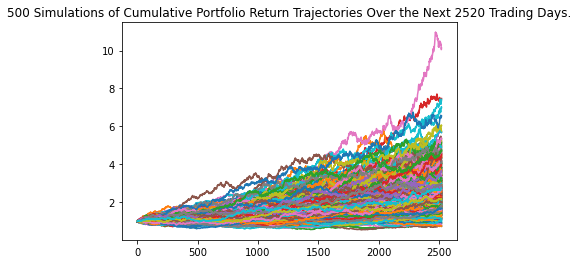

In [32]:
# Plot simulation outcomes
line_plot_ten = MC_10year.plot_simulation()

# Save the plot for future usage
line_plot_ten.get_figure().savefig("MC_10year_sim_plot.png", bbox_inches="tight")

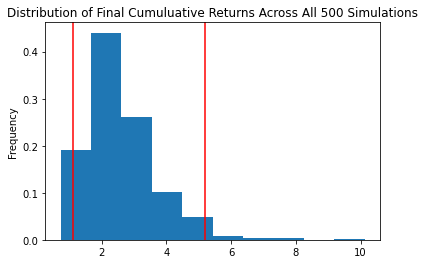

In [33]:
# Plot probability distribution and confidence intervals
dist_plot_10 = MC_10year.plot_distribution()

# Save the plot for future usage
dist_plot_10.get_figure().savefig('MC_10year_dist_plot.png',bbox_inches='tight')

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_ten = MC_10year.summarize_cumulative_return()

# Print summary statistics
print(tbl_ten)

count           500.000000
mean              2.603006
std               1.106539
min               0.726783
25%               1.882727
50%               2.400242
75%               3.084261
max              10.131799
95% CI Lower      1.102834
95% CI Upper      5.179540
Name: 2520, dtype: float64


In [35]:
# Set initial investment
initial_investment_ten = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl_ten[8]*initial_investment_ten,2)
ci_upper_ten = round(tbl_ten[9]*initial_investment_ten,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_ten} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $66170.05 and $310772.4
